In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic customer data
n_samples = 300

# Cluster 1: Young customers with moderate income and high spending
age1 = np.random.randint(18, 30, size=n_samples//3)
income1 = np.random.normal(40, 5, size=n_samples//3)
spending1 = np.random.normal(80, 5, size=n_samples//3)

# Cluster 2: Middle-aged customers with high income and moderate spending
age2 = np.random.randint(30, 50, size=n_samples//3)
income2 = np.random.normal(80, 8, size=n_samples//3)
spending2 = np.random.normal(50, 6, size=n_samples//3)

# Cluster 3: Older customers with low income and low spending
age3 = np.random.randint(50, 70, size=n_samples//3)
income3 = np.random.normal(25, 4, size=n_samples//3)
spending3 = np.random.normal(20, 5, size=n_samples//3)

# Combine into a single dataset
data = {
    'Age': np.concatenate([age1, age2, age3]),
    'Annual_Income': np.concatenate([income1, income2, income3]),
    'Spending_Score': np.concatenate([spending1, spending2, spending3])
}

df = pd.DataFrame(data)
print("Sample of the dataset:")
print(df.head())

Sample of the dataset:
   Age  Annual_Income  Spending_Score
0   24      39.782316       75.812093
1   21      38.623495       83.385930
2   28      32.184666       89.361596
3   25      36.021845       81.981870
4   22      44.652922       76.871919


c:\Users\pakih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pakih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pakih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\pakih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

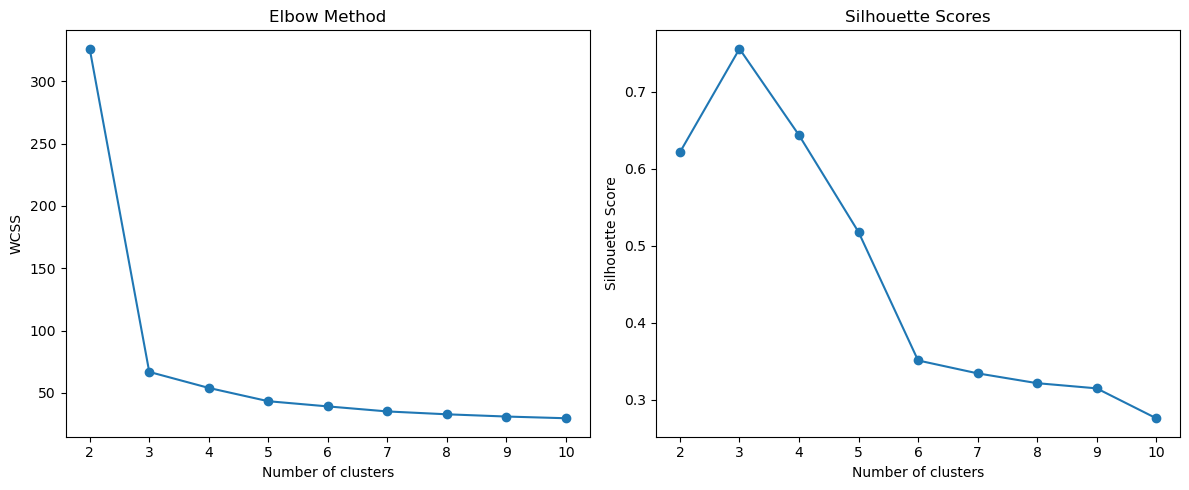

c:\Users\pakih\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


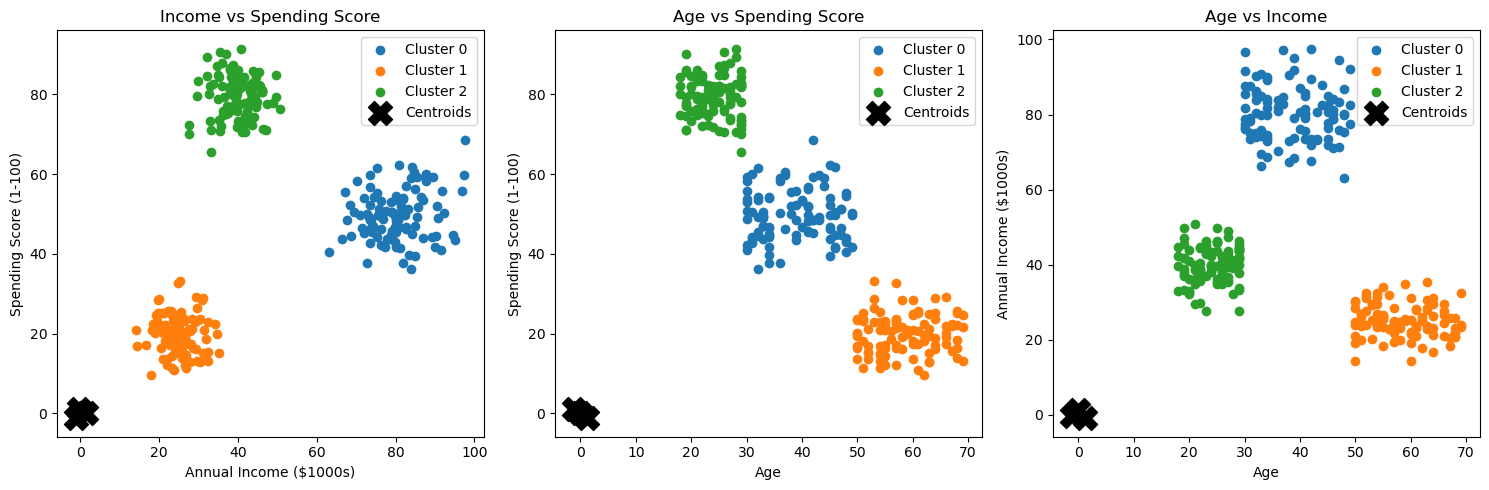


Cluster Characteristics:
           Age  Annual_Income  Spending_Score
Cluster                                      
0        38.70      80.308364       49.718612
1        58.59      25.055529       19.986218
2        24.04      39.981344       79.307005

Silhouette Score: 0.756
(Closer to 1 indicates better defined clusters)


In [2]:
# Step 1: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Determine optimal number of clusters using Elbow Method
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []
max_clusters = 10

for i in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Step 3: Perform K-Means clustering (we'll choose 3 clusters based on the plots)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Step 4: Add cluster labels to original data
df['Cluster'] = clusters

# Step 5: Visualize the clusters
plt.figure(figsize=(15, 5))

# Plot 1: Income vs Spending Score
plt.subplot(1, 3, 1)
for cluster in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == cluster]['Annual_Income'],
                df[df['Cluster'] == cluster]['Spending_Score'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=300, c='black', marker='X', label='Centroids')
plt.title('Income vs Spending Score')
plt.xlabel('Annual Income ($1000s)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Plot 2: Age vs Spending Score
plt.subplot(1, 3, 2)
for cluster in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == cluster]['Age'],
                df[df['Cluster'] == cluster]['Spending_Score'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            s=300, c='black', marker='X', label='Centroids')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Plot 3: Age vs Income
plt.subplot(1, 3, 3)
for cluster in range(optimal_clusters):
    plt.scatter(df[df['Cluster'] == cluster]['Age'],
                df[df['Cluster'] == cluster]['Annual_Income'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', marker='X', label='Centroids')
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Annual Income ($1000s)')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_summary)

# Step 7: Evaluate clustering quality
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")
print("(Closer to 1 indicates better defined clusters)")